In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
# generate a list of column names
new_columns = list(range(-80, 19))

In [3]:
data= pd.read_csv(r"D:\ten organism\train data\ussrey bac vs. shuffled ten.csv")
downstream= pd.read_csv(r"D:\downstream control\train organism\train_downstream_ussrey.csv")

In [4]:
data.isnull().values.any()

False

In [5]:
data.head(5)

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,10,11,12,13,14,15,16,17,18,label
0,-6.78,-6.57,-10.51,-6.57,-10.51,-5.37,-5.37,-9.81,-8.26,-6.78,...,-9.81,-8.26,-9.69,-10.51,-5.37,-3.82,-6.78,-8.26,-9.81,1
1,-6.78,-9.81,-8.26,-6.57,-5.37,-5.37,-6.57,-9.81,-6.57,-5.37,...,-6.78,-9.81,-5.37,-10.51,-6.57,-10.51,-6.57,-5.37,-6.57,1
2,-3.82,-6.57,-5.37,-6.57,-10.51,-6.57,-9.81,-5.37,-5.37,-6.78,...,-9.69,-8.26,-9.81,-6.57,-6.57,-10.51,-5.37,-5.37,-6.57,1
3,-6.78,-14.59,-9.69,-8.26,-9.81,-5.37,-6.57,-5.37,-5.37,-3.82,...,-9.81,-6.57,-6.57,-6.57,-8.26,-9.81,-6.78,-14.59,-8.26,1
4,-3.82,-5.37,-6.57,-5.37,-9.81,-6.78,-5.37,-3.82,-10.51,-6.57,...,-9.69,-9.81,-5.37,-6.78,-9.81,-5.37,-5.37,-5.37,-5.37,1


In [6]:
downstream.head(5)

,150,151,152,153,154,155,156,157,158,159,...,239,240,241,242,243,244,245,246,247,248
0,-6.78,-10.51,-3.82,-6.57,-9.81,-6.57,-6.57,-5.37,-5.37,-3.82,...,-6.78,-14.59,-8.26,-9.69,-8.26,-8.26,-9.81,-5.37,-6.78,-10.51
1,-8.26,-9.81,-6.78,-9.81,-5.37,-6.78,-8.26,-9.81,-5.37,-10.51,...,-6.57,-14.59,-8.26,-9.69,-14.59,-6.57,-6.57,-3.82,-10.51,-9.69
2,-6.57,-8.26,-9.81,-5.37,-6.78,-9.81,-10.51,-6.57,-5.37,-10.51,...,-5.37,-5.37,-10.51,-6.57,-6.78,-14.59,-6.78,-5.37,-6.57,-9.81
3,-10.51,-6.57,-9.81,-5.37,-6.57,-5.37,-5.37,-6.57,-10.51,-5.37,...,-9.69,-14.59,-6.78,-6.57,-14.59,-6.78,-5.37,-5.37,-3.82,-5.37
4,-5.37,-5.37,-6.78,-9.81,-10.51,-9.69,-14.59,-6.78,-9.81,-6.78,...,-6.78,-9.81,-6.78,-6.57,-9.81,-6.57,-6.57,-9.81,-6.57,-3.82


### Preprocessing Promoter data

In [7]:
promoter_seq = data[data['label'] == 1]
promoter_seq.shape

(14669, 100)

In [8]:
promoter_no_label=promoter_seq.drop(columns=['label'])
promoter_no_label.columns=new_columns
promoter_no_label.shape

(14669, 99)

In [9]:
promoter_without_label=promoter_no_label
promoter_without_label.shape

(14669, 99)

In [10]:
promoter_without_label['label']=1

In [11]:
promoter= promoter_without_label
promoter['label']=promoter['label'].astype(int)
promoter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14669 entries, 0 to 14668
Data columns (total 100 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   -80     14669 non-null  float64
 1   -79     14669 non-null  float64
 2   -78     14669 non-null  float64
 3   -77     14669 non-null  float64
 4   -76     14669 non-null  float64
 5   -75     14669 non-null  float64
 6   -74     14669 non-null  float64
 7   -73     14669 non-null  float64
 8   -72     14669 non-null  float64
 9   -71     14669 non-null  float64
 10  -70     14669 non-null  float64
 11  -69     14669 non-null  float64
 12  -68     14669 non-null  float64
 13  -67     14669 non-null  float64
 14  -66     14669 non-null  float64
 15  -65     14669 non-null  float64
 16  -64     14669 non-null  float64
 17  -63     14669 non-null  float64
 18  -62     14669 non-null  float64
 19  -61     14669 non-null  float64
 20  -60     14669 non-null  float64
 21  -59     14669 non-null  float64
 2

### Preprocessing Downstream Data

In [12]:
downstream

,150,151,152,153,154,155,156,157,158,159,...,239,240,241,242,243,244,245,246,247,248
0,-6.78,-10.51,-3.82,-6.57,-9.81,-6.57,-6.57,-5.37,-5.37,-3.82,...,-6.78,-14.59,-8.26,-9.69,-8.26,-8.26,-9.81,-5.37,-6.78,-10.51
1,-8.26,-9.81,-6.78,-9.81,-5.37,-6.78,-8.26,-9.81,-5.37,-10.51,...,-6.57,-14.59,-8.26,-9.69,-14.59,-6.57,-6.57,-3.82,-10.51,-9.69
2,-6.57,-8.26,-9.81,-5.37,-6.78,-9.81,-10.51,-6.57,-5.37,-10.51,...,-5.37,-5.37,-10.51,-6.57,-6.78,-14.59,-6.78,-5.37,-6.57,-9.81
3,-10.51,-6.57,-9.81,-5.37,-6.57,-5.37,-5.37,-6.57,-10.51,-5.37,...,-9.69,-14.59,-6.78,-6.57,-14.59,-6.78,-5.37,-5.37,-3.82,-5.37
4,-5.37,-5.37,-6.78,-9.81,-10.51,-9.69,-14.59,-6.78,-9.81,-6.78,...,-6.78,-9.81,-6.78,-6.57,-9.81,-6.57,-6.57,-9.81,-6.57,-3.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14664,-6.57,-5.37,-6.57,-14.59,-6.78,-6.57,-8.26,-10.51,-5.37,-6.57,...,-6.78,-9.81,-6.78,-10.51,-5.37,-6.57,-14.59,-8.26,-8.26,-6.57
14665,-9.81,-5.37,-6.78,-10.51,-9.81,-6.57,-10.51,-8.26,-6.57,-6.78,...,-6.57,-5.37,-3.82,-10.51,-6.78,-9.81,-8.26,-6.78,-3.82,-10.51
14666,-5.37,-5.37,-5.37,-5.37,-6.57,-8.26,-14.59,-9.69,-10.51,-3.82,...,-5.37,-3.82,-6.78,-9.81,-10.51,-6.57,-6.78,-10.51,-5.37,-6.57
14667,-9.69,-9.81,-5.37,-6.57,-6.57,-8.26,-9.81,-5.37,-6.78,-9.81,...,-3.82,-6.57,-5.37,-5.37,-5.37,-5.37,-3.82,-10.51,-6.57,-10.51


In [13]:
downstream.columns= new_columns
downstream_no_label=downstream
downstream['label']= 0
downstream['label']= downstream['label'].astype(int)

In [14]:
downstream

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,10,11,12,13,14,15,16,17,18,label
0,-6.78,-10.51,-3.82,-6.57,-9.81,-6.57,-6.57,-5.37,-5.37,-3.82,...,-14.59,-8.26,-9.69,-8.26,-8.26,-9.81,-5.37,-6.78,-10.51,0
1,-8.26,-9.81,-6.78,-9.81,-5.37,-6.78,-8.26,-9.81,-5.37,-10.51,...,-14.59,-8.26,-9.69,-14.59,-6.57,-6.57,-3.82,-10.51,-9.69,0
2,-6.57,-8.26,-9.81,-5.37,-6.78,-9.81,-10.51,-6.57,-5.37,-10.51,...,-5.37,-10.51,-6.57,-6.78,-14.59,-6.78,-5.37,-6.57,-9.81,0
3,-10.51,-6.57,-9.81,-5.37,-6.57,-5.37,-5.37,-6.57,-10.51,-5.37,...,-14.59,-6.78,-6.57,-14.59,-6.78,-5.37,-5.37,-3.82,-5.37,0
4,-5.37,-5.37,-6.78,-9.81,-10.51,-9.69,-14.59,-6.78,-9.81,-6.78,...,-9.81,-6.78,-6.57,-9.81,-6.57,-6.57,-9.81,-6.57,-3.82,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14664,-6.57,-5.37,-6.57,-14.59,-6.78,-6.57,-8.26,-10.51,-5.37,-6.57,...,-9.81,-6.78,-10.51,-5.37,-6.57,-14.59,-8.26,-8.26,-6.57,0
14665,-9.81,-5.37,-6.78,-10.51,-9.81,-6.57,-10.51,-8.26,-6.57,-6.78,...,-5.37,-3.82,-10.51,-6.78,-9.81,-8.26,-6.78,-3.82,-10.51,0
14666,-5.37,-5.37,-5.37,-5.37,-6.57,-8.26,-14.59,-9.69,-10.51,-3.82,...,-3.82,-6.78,-9.81,-10.51,-6.57,-6.78,-10.51,-5.37,-6.57,0
14667,-9.69,-9.81,-5.37,-6.57,-6.57,-8.26,-9.81,-5.37,-6.78,-9.81,...,-6.57,-5.37,-5.37,-5.37,-5.37,-3.82,-10.51,-6.57,-10.51,0


### Plotting Graph

In [15]:
for_line= pd.DataFrame(promoter_no_label.mean())
downstream_line= pd.DataFrame(downstream_no_label.mean())

In [16]:
for_line.reset_index(drop=False, inplace=True)
for_line.drop(for_line.index[-1], inplace=True)
for_line['index']=for_line['index'].astype(int)

downstream_line.reset_index(drop=False, inplace=True)
downstream_line.drop(downstream_line.index[-1], inplace=True)

for_line

,index,0
0,-80,-8.101757
1,-79,-8.124299
2,-78,-8.163010
3,-77,-8.136524
4,-76,-8.138863
...,...,...
94,14,-7.983544
95,15,-8.022828
96,16,-8.046257
97,17,-8.025855


In [17]:
downstream_columns= list(range(150,249))
downstream_line['downstream position']= downstream_columns
downstream_line['index']=downstream_line['index'].astype(int)
downstream_line

,index,0,downstream position
0,-80,-8.376394,150
1,-79,-8.345650,151
2,-78,-8.354927,152
3,-77,-8.428811,153
4,-76,-8.355195,154
...,...,...,...
94,14,-8.425919,244
95,15,-8.373127,245
96,16,-8.427213,246
97,17,-8.438258,247


In [18]:
downstream_line.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                99 non-null     int32  
 1   0                    99 non-null     float64
 2   downstream position  99 non-null     int64  
dtypes: float64(1), int32(1), int64(1)
memory usage: 2.1 KB


In [19]:
for_line.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   99 non-null     int32  
 1   0       99 non-null     float64
dtypes: float64(1), int32(1)
memory usage: 1.3 KB


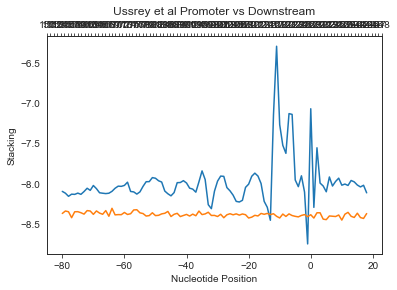

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('white')
# create the Seaborn line plots
plot = sns.lineplot(x='index', y=0, data=for_line)
plot = sns.lineplot(x='index', y=0, data=downstream_line)

# create a twin Axes object for the new x-axis
ax2 = plot.twiny()

# set the new x-axis tick positions and labels
ax2.set_xticks(downstream_line.index)
ax2.set_xticklabels(downstream_line['downstream position'])

# set the x-axis and y-axis labels and title
plot.set(xlabel="Nucleotide Position", ylabel="Stacking", title='Ussrey et al Promoter vs Downstream')

# show the plot
plt.show()


### Preparing Training Data

In [21]:
data= pd.concat([promoter,downstream])

In [22]:
data.reset_index(drop=True, inplace=True)

In [23]:
data

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,10,11,12,13,14,15,16,17,18,label
0,-6.78,-6.57,-10.51,-6.57,-10.51,-5.37,-5.37,-9.81,-8.26,-6.78,...,-9.81,-8.26,-9.69,-10.51,-5.37,-3.82,-6.78,-8.26,-9.81,1
1,-6.78,-9.81,-8.26,-6.57,-5.37,-5.37,-6.57,-9.81,-6.57,-5.37,...,-6.78,-9.81,-5.37,-10.51,-6.57,-10.51,-6.57,-5.37,-6.57,1
2,-3.82,-6.57,-5.37,-6.57,-10.51,-6.57,-9.81,-5.37,-5.37,-6.78,...,-9.69,-8.26,-9.81,-6.57,-6.57,-10.51,-5.37,-5.37,-6.57,1
3,-6.78,-14.59,-9.69,-8.26,-9.81,-5.37,-6.57,-5.37,-5.37,-3.82,...,-9.81,-6.57,-6.57,-6.57,-8.26,-9.81,-6.78,-14.59,-8.26,1
4,-3.82,-5.37,-6.57,-5.37,-9.81,-6.78,-5.37,-3.82,-10.51,-6.57,...,-9.69,-9.81,-5.37,-6.78,-9.81,-5.37,-5.37,-5.37,-5.37,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29333,-6.57,-5.37,-6.57,-14.59,-6.78,-6.57,-8.26,-10.51,-5.37,-6.57,...,-9.81,-6.78,-10.51,-5.37,-6.57,-14.59,-8.26,-8.26,-6.57,0
29334,-9.81,-5.37,-6.78,-10.51,-9.81,-6.57,-10.51,-8.26,-6.57,-6.78,...,-5.37,-3.82,-10.51,-6.78,-9.81,-8.26,-6.78,-3.82,-10.51,0
29335,-5.37,-5.37,-5.37,-5.37,-6.57,-8.26,-14.59,-9.69,-10.51,-3.82,...,-3.82,-6.78,-9.81,-10.51,-6.57,-6.78,-10.51,-5.37,-6.57,0
29336,-9.69,-9.81,-5.37,-6.57,-6.57,-8.26,-9.81,-5.37,-6.78,-9.81,...,-6.57,-5.37,-5.37,-5.37,-5.37,-3.82,-10.51,-6.57,-10.51,0


# Prediction using machine learning

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn import metrics
import numpy as np
from sklearn.model_selection import KFold
from statistics import mean
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix


In [25]:

X = data.drop('label', axis=1)
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=101)

inputs = np.concatenate((X_train, X_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)





In [26]:
feature_list=list(X_train.columns)

In [27]:
X.shape

(29338, 99)

## Model Training

In [28]:
kfold = KFold(n_splits=10, shuffle=True)
clf = XGBClassifier(colsample_bytree=0.5, gamma=0, learning_rate=0.1, 
                    max_depth=None, min_child_weight=5, n_estimators=300, 
                    subsample=1.0, n_jobs=-1, random_state=101)
fold_no = 1
accuracy_list = []
precision_list = []
recall_list = []
f1_score_list = []
mcc_list = []
specificity_list = []

for train, test in kfold.split(inputs, targets):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

    inputs = np.concatenate((X_train, X_test), axis=0)
    targets = np.concatenate((y_train, y_test), axis=0)

    trainX, testX = inputs[train], inputs[test]
    trainY, testY = targets[train], targets[test]
    clf.fit(trainX, trainY)
    y_pred = clf.predict(testX)

    accuracy_list.append(accuracy_score(testY, y_pred))
    precision_list.append(precision_score(testY, y_pred))
    recall_list.append(recall_score(testY, y_pred))
    f1_score_list.append(f1_score(testY, y_pred))
    
    # Calculate MCC
    mcc = matthews_corrcoef(testY, y_pred)
    mcc_list.append(mcc)
    
    # Calculate specificity
    tn, fp, fn, tp = confusion_matrix(testY, y_pred).ravel()
    specificity = tn / (tn + fp)
    specificity_list.append(specificity)

    print("Fold {}: Accuracy: {}, Precision: {}, Recall: {}, F1 Score: {}, MCC: {}, Specificity: {}".format(
        fold_no, accuracy_list[-1], precision_list[-1], recall_list[-1], f1_score_list[-1], mcc_list[-1], specificity_list[-1]))
    
    fold_no += 1

Fold 1: Accuracy: 0.8667348329925018, Precision: 0.8893499308437067, Recall: 0.8477257745550428, F1 Score: 0.8680391495106311, MCC: 0.7344594966418228, Specificity: 0.8870853916725476
Fold 2: Accuracy: 0.8793456032719836, Precision: 0.8953651685393258, Recall: 0.8614864864864865, F1 Score: 0.8780991735537189, MCC: 0.7593070106804167, Specificity: 0.8975240715268226
Fold 3: Accuracy: 0.880027266530334, Precision: 0.910394265232975, Recall: 0.8483633934535738, F1 Score: 0.8782849239280774, MCC: 0.7621358739809521, Specificity: 0.9130132219902575
Fold 4: Accuracy: 0.8820722563053851, Precision: 0.9017094017094017, Recall: 0.858887381275441, F1 Score: 0.8797776233495483, MCC: 0.7650639434250255, Specificity: 0.9054794520547945
Fold 5: Accuracy: 0.8769597818677574, Precision: 0.8952802359882006, Recall: 0.8471737613398465, F1 Score: 0.8705629257798494, MCC: 0.7545310103566601, Specificity: 0.905396402398401
Fold 6: Accuracy: 0.8902522154055896, Precision: 0.9001447178002895, Recall: 0.87114

In [29]:
accuracy_list

[0.8667348329925018,
 0.8793456032719836,
 0.880027266530334,
 0.8820722563053851,
 0.8769597818677574,
 0.8902522154055896,
 0.865371506475801,
 0.8670756646216768,
 0.8731674053869758,
 0.8677122400272759]

In [30]:
precision_list

[0.8893499308437067,
 0.8953651685393258,
 0.910394265232975,
 0.9017094017094017,
 0.8952802359882006,
 0.9001447178002895,
 0.886685552407932,
 0.8903318903318903,
 0.8927007299270073,
 0.872416250890948]

In [31]:
recall_list

[0.8477257745550428,
 0.8614864864864865,
 0.8483633934535738,
 0.858887381275441,
 0.8471737613398465,
 0.8711484593837535,
 0.8419636852723604,
 0.8383152173913043,
 0.8446132596685083,
 0.854152128401954]

In [32]:
specificity_list

[0.8870853916725476,
 0.8975240715268226,
 0.9130132219902575,
 0.9054794520547945,
 0.905396402398401,
 0.9083665338645418,
 0.889426399447132,
 0.896032831737346,
 0.901010101010101,
 0.8806666666666667]

In [33]:
f1_score_list 

[0.8680391495106311,
 0.8780991735537189,
 0.8782849239280774,
 0.8797776233495483,
 0.8705629257798494,
 0.8854092526690391,
 0.8637461193515005,
 0.8635409377186843,
 0.8679914833215047,
 0.8631875881523273]

In [34]:
mcc_list

[0.7344594966418228,
 0.7593070106804167,
 0.7621358739809521,
 0.7650639434250255,
 0.7545310103566601,
 0.7805508168049774,
 0.7318366309971422,
 0.7354657341534957,
 0.7471834458310866,
 0.7353167006971566]

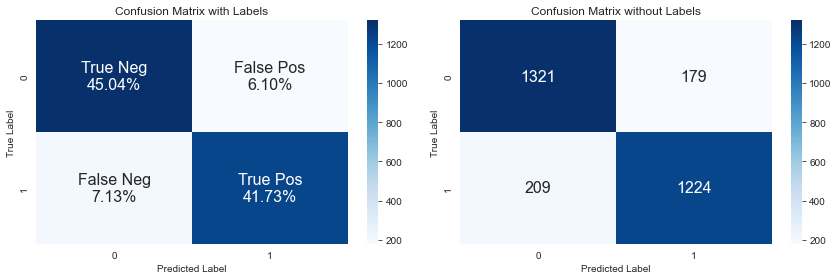

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

train_cm = confusion_matrix(testY, y_pred)

# Define labels for the four quadrants of the confusion matrix
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']

# Reshape confusion matrix into a 1D array for plotting
train_cm_array = train_cm.ravel()

# Compute percentage values for each quadrant
percentages = ['{0:.2%}'.format(value) for value in train_cm_array / np.sum(train_cm_array)]

# Combine labels and percentages into a list of strings for plotting
labels = [f"{v1}\n{v2}" for v1, v2 in zip(labels, percentages)]

# Reshape labels into a 2D array for plotting
labels = np.asarray(labels).reshape(2,2)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot with labels
sns.heatmap(train_cm, annot=labels, annot_kws={"size": 16}, cmap='Blues', fmt='', ax=axes[0])
axes[0].set_title('Confusion Matrix with Labels')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# Plot without labels
sns.heatmap(train_cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g', ax=axes[1])
axes[1].set_title('Confusion Matrix without Labels')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()


In [36]:
import pickle

# Save the trained model to a file in pickle format
model_filename = 'DUD_model.pickle'
with open(model_filename, 'wb') as file:
    pickle.dump(clf, file)

print("Model saved successfully.")


Model saved successfully.


In [37]:
print(mean(accuracy_list))

0.8748718772885281


C:\Users\Subhojit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


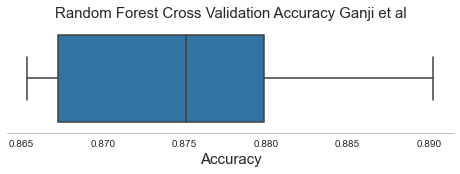

In [38]:
# Create a new figure with a larger size
plt.figure(figsize=(8,2))

# Create the boxplot with a custom title and color
ax = sns.boxplot(np.array(accuracy_list))
#sns.set(style='white')
#sns.set_palette('default')
plt.title('Random Forest Cross Validation Accuracy Ganji et al', fontsize=15)  # Set font size of title
plt.xlabel('Accuracy', fontsize=15)  # Set font size of x-label

# Remove top and right spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Remove left and bottom ticks
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')

# Remove left and bottom spines and set their color to gray
ax.spines['left'].set_color('gray')
ax.spines['bottom'].set_color('gray')
ax.spines['left'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(0.5)

# Display the plot
plt.show()


## Feature Importance

In [39]:
clf.feature_importances_

array([0.00508992, 0.00619818, 0.00573549, 0.00547452, 0.00575503,
       0.00558332, 0.00581008, 0.00558307, 0.00535727, 0.00567456,
       0.00561488, 0.00467627, 0.00609147, 0.00611759, 0.00513914,
       0.00536875, 0.0057186 , 0.00600897, 0.00580574, 0.00559594,
       0.00549243, 0.00537906, 0.00577529, 0.00624792, 0.00563105,
       0.00584437, 0.00612874, 0.00574003, 0.00702293, 0.00535971,
       0.00584069, 0.00560738, 0.00571954, 0.00504621, 0.00545392,
       0.00540154, 0.00575551, 0.00591248, 0.00554586, 0.00551677,
       0.0062286 , 0.00662599, 0.00584994, 0.0056426 , 0.00566921,
       0.00653616, 0.00718125, 0.00662968, 0.00679186, 0.00570501,
       0.0060613 , 0.00715492, 0.00631725, 0.0057493 , 0.00782015,
       0.00770809, 0.00805025, 0.00768133, 0.00768634, 0.0068373 ,
       0.00787403, 0.00724477, 0.00811898, 0.00626451, 0.00660081,
       0.00790897, 0.00855841, 0.01720507, 0.08258976, 0.12013297,
       0.04165101, 0.01779048, 0.01816748, 0.04023905, 0.02960

In [40]:
clf.feature_importances_.shape

(99,)

In [41]:
X_train.columns

Index([-80, -79, -78, -77, -76, -75, -74, -73, -72, -71, -70, -69, -68, -67,
       -66, -65, -64, -63, -62, -61, -60, -59, -58, -57, -56, -55, -54, -53,
       -52, -51, -50, -49, -48, -47, -46, -45, -44, -43, -42, -41, -40, -39,
       -38, -37, -36, -35, -34, -33, -32, -31, -30, -29, -28, -27, -26, -25,
       -24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13, -12, -11,
       -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,   3,
         4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,
        18],
      dtype='object')

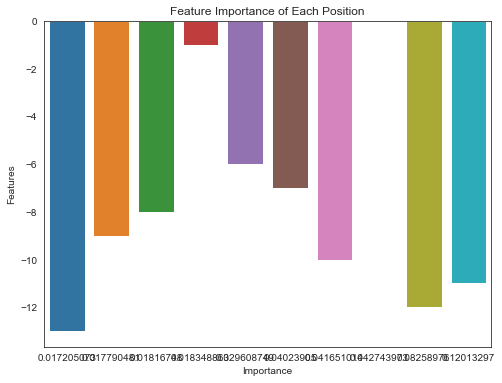

In [42]:
imp_df= pd.DataFrame({
    "Features": X_train.columns,
    "Importance": clf.feature_importances_
})

fi= imp_df.sort_values(by="Importance",ascending=False)

fi2=fi.head(10)
plt.figure(figsize=(8,6))
sns.barplot(data=fi2, x="Importance", y="Features")
plt.title('Feature Importance of Each Position')
plt.show()

In [43]:
feature_importance= pd.DataFrame(clf.feature_importances_)
feature_importance.reset_index(drop=False, inplace=True)
feature_importance['indice']= new_columns
feature_importance

,index,0,indice
0,0,0.005090,-80
1,1,0.006198,-79
2,2,0.005735,-78
3,3,0.005475,-77
4,4,0.005755,-76
...,...,...,...
94,94,0.005365,14
95,95,0.005421,15
96,96,0.005310,16
97,97,0.005291,17


[Text(0.5, 0, 'features'),
 Text(0, 0.5, 'importance'),
 Text(0.5, 1.0, 'feature importance')]

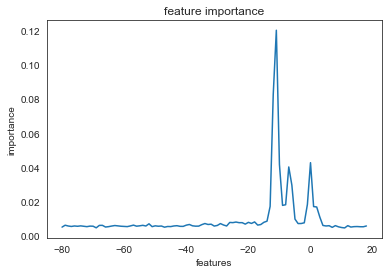

In [44]:
plot= sns.lineplot(x='indice', y=0, data=feature_importance)
plot.set(xlabel ="features", ylabel = "importance", title ='feature importance')

In [45]:
print("Accuracy:",metrics.accuracy_score(testY, y_pred))
print("Precision:",metrics.precision_score(testY, y_pred))
print("Recall:",metrics.recall_score(testY, y_pred))
print("f1_score:",metrics.f1_score(testY, y_pred))

Accuracy: 0.8677122400272759
Precision: 0.872416250890948
Recall: 0.854152128401954
f1_score: 0.8631875881523273


C:\Users\Subhojit\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


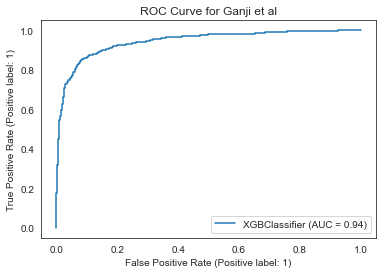

In [45]:
roc_curve= metrics.plot_roc_curve(clf, testX, testY)
roc_curve.ax_.set_title("ROC Curve for Ganji et al")
plt.show()

C:\Users\Subhojit\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


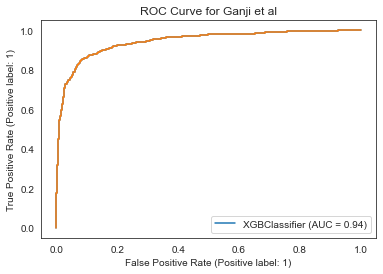

In [46]:
import pandas as pd

# Assuming roc_curve is the object returned by metrics.plot_roc_curve
roc_curve = metrics.plot_roc_curve(clf, testX, testY)

# Extract the data points from roc_curve
fpr = roc_curve.fpr
tpr = roc_curve.tpr

# Create a DataFrame
roc_df = pd.DataFrame({'False Positive Rate': fpr, 'True Positive Rate': tpr})

#roc_df.to_csv('d:/ROC Curve data/downstream_ussrey_xg_roc_df.csv', index=False)

# Plot the ROC curve from the DataFrame
plt.plot(roc_df['False Positive Rate'], roc_df['True Positive Rate'])
plt.title("ROC Curve for Ganji et al")
plt.show()


# Using Shapley

In [46]:
!pip install shap

In [47]:
import shap


In [48]:
promoter.shape

(14669, 100)

### X_PCA promotor

In [49]:
import random

# set the random seed to ensure reproducibility
#random.seed(123)

# generate 40 random numbers between 1 to 15000
random_numbers = [random.randint(1, 10000) for _ in range(40)]

# print the random numbers
print(random_numbers)


[7621, 1382, 3452, 544, 4720, 2668, 9656, 1360, 3315, 3181, 5363, 2951, 4472, 1531, 4922, 5604, 4537, 4622, 7847, 9565, 994, 1957, 6857, 6149, 3888, 6356, 8492, 1791, 4858, 7002, 1133, 8846, 5031, 8048, 1106, 1367, 368, 3507, 2677, 5761]


In [50]:
X_PCA_promoters = X.loc[[8499, 6345, 8807, 5017, 2395, 4771, 6378, 6038, 2073, 8765, 
                         5534, 8473, 1959, 2733, 9656, 6329, 7081, 1017, 2229, 7451, 338, 5727, 7369, 7392, 4978, 7029, 463, 2599, 8546, 
                         5323, 8468, 8434, 9119, 2251, 5630, 8195, 1717, 8937, 6046, 3685]]

In [51]:
X_PCA_promoters

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,9,10,11,12,13,14,15,16,17,18
8499,-6.57,-9.81,-8.26,-6.57,-10.51,-6.57,-6.78,-14.59,-6.78,-9.81,...,-14.59,-9.69,-14.59,-8.26,-9.69,-8.26,-9.81,-10.51,-9.69,-14.59
6345,-10.51,-6.57,-10.51,-6.57,-8.26,-14.59,-9.69,-9.81,-6.57,-9.81,...,-6.57,-5.37,-6.78,-9.81,-6.78,-10.51,-6.57,-8.26,-9.81,-6.78
8807,-6.57,-8.26,-14.59,-9.69,-14.59,-6.78,-6.57,-8.26,-9.81,-6.78,...,-5.37,-6.57,-8.26,-14.59,-9.69,-9.81,-6.57,-5.37,-5.37,-9.81
5017,-10.51,-6.57,-6.57,-6.57,-10.51,-5.37,-5.37,-6.57,-10.51,-3.82,...,-10.51,-8.26,-9.69,-9.81,-10.51,-8.26,-9.69,-10.51,-5.37,-9.81
2395,-6.57,-6.78,-9.81,-6.78,-10.51,-9.81,-6.57,-6.78,-8.26,-8.26,...,-6.57,-5.37,-3.82,-6.57,-5.37,-9.81,-6.78,-5.37,-5.37,-5.37
4771,-6.78,-10.51,-6.57,-9.81,-10.51,-6.78,-5.37,-6.57,-8.26,-14.59,...,-9.81,-8.26,-8.26,-6.57,-10.51,-9.69,-9.81,-6.57,-6.57,-14.59
6378,-9.81,-6.78,-8.26,-14.59,-6.57,-10.51,-6.57,-5.37,-6.57,-3.82,...,-8.26,-14.59,-6.57,-5.37,-10.51,-6.78,-3.82,-5.37,-6.57,-6.57
6038,-6.78,-3.82,-6.57,-9.81,-6.78,-3.82,-10.51,-6.78,-3.82,-6.57,...,-3.82,-6.57,-5.37,-9.81,-6.78,-9.81,-9.69,-9.81,-6.57,-3.82
2073,-9.69,-10.51,-3.82,-6.78,-14.59,-6.57,-6.78,-14.59,-6.57,-10.51,...,-6.57,-9.81,-6.57,-5.37,-6.57,-5.37,-5.37,-3.82,-6.57,-9.81
8765,-6.57,-5.37,-6.57,-3.82,-10.51,-8.26,-6.57,-6.57,-9.81,-8.26,...,-6.57,-6.57,-14.59,-8.26,-6.78,-5.37,-9.81,-6.78,-3.82,-6.57


# X promoters

In [52]:
X_promoters= promoter.drop(columns=['label']) #X.loc[:14668]
X_promoters

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,9,10,11,12,13,14,15,16,17,18
0,-6.78,-6.57,-10.51,-6.57,-10.51,-5.37,-5.37,-9.81,-8.26,-6.78,...,-6.57,-9.81,-8.26,-9.69,-10.51,-5.37,-3.82,-6.78,-8.26,-9.81
1,-6.78,-9.81,-8.26,-6.57,-5.37,-5.37,-6.57,-9.81,-6.57,-5.37,...,-9.81,-6.78,-9.81,-5.37,-10.51,-6.57,-10.51,-6.57,-5.37,-6.57
2,-3.82,-6.57,-5.37,-6.57,-10.51,-6.57,-9.81,-5.37,-5.37,-6.78,...,-10.51,-9.69,-8.26,-9.81,-6.57,-6.57,-10.51,-5.37,-5.37,-6.57
3,-6.78,-14.59,-9.69,-8.26,-9.81,-5.37,-6.57,-5.37,-5.37,-3.82,...,-5.37,-9.81,-6.57,-6.57,-6.57,-8.26,-9.81,-6.78,-14.59,-8.26
4,-3.82,-5.37,-6.57,-5.37,-9.81,-6.78,-5.37,-3.82,-10.51,-6.57,...,-10.51,-9.69,-9.81,-5.37,-6.78,-9.81,-5.37,-5.37,-5.37,-5.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14664,-6.57,-8.26,-8.26,-9.81,-6.57,-5.37,-5.37,-5.37,-6.57,-14.59,...,-6.57,-14.59,-6.57,-6.57,-5.37,-5.37,-6.57,-10.51,-9.81,-6.57
14665,-6.78,-8.26,-10.51,-9.81,-6.57,-5.37,-5.37,-5.37,-10.51,-6.57,...,-14.59,-6.78,-3.82,-6.57,-6.57,-14.59,-6.78,-5.37,-3.82,-6.78
14666,-8.26,-9.81,-6.57,-3.82,-5.37,-5.37,-5.37,-5.37,-5.37,-5.37,...,-5.37,-5.37,-5.37,-3.82,-6.57,-6.57,-8.26,-14.59,-6.57,-5.37
14667,-14.59,-6.57,-6.78,-9.81,-6.78,-10.51,-5.37,-9.81,-6.57,-10.51,...,-6.57,-5.37,-6.57,-3.82,-5.37,-6.57,-3.82,-5.37,-6.57,-5.37


In [53]:
explainer = shap.TreeExplainer(clf, X_promoters)
shap_values = explainer.shap_values(X_promoters)

100%|===================| 14638/14669 [03:13<00:00]        

In [54]:
shap_file = pd.DataFrame(shap_values)
shap_train_csv_file = 'shap_train.csv'

with open(shap_train_csv_file, mode='w') as f:
    shap_file.to_csv(f)

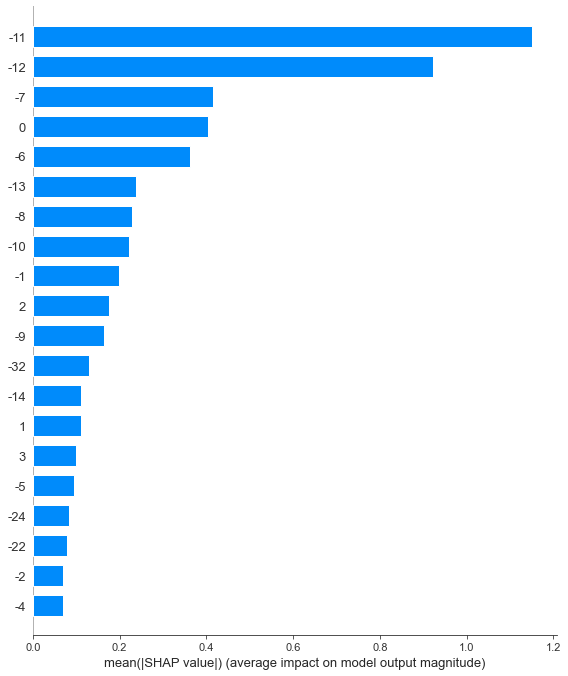

In [55]:
shap.summary_plot(shap_values,X_promoters, plot_type="bar", feature_names = X_promoters.columns)

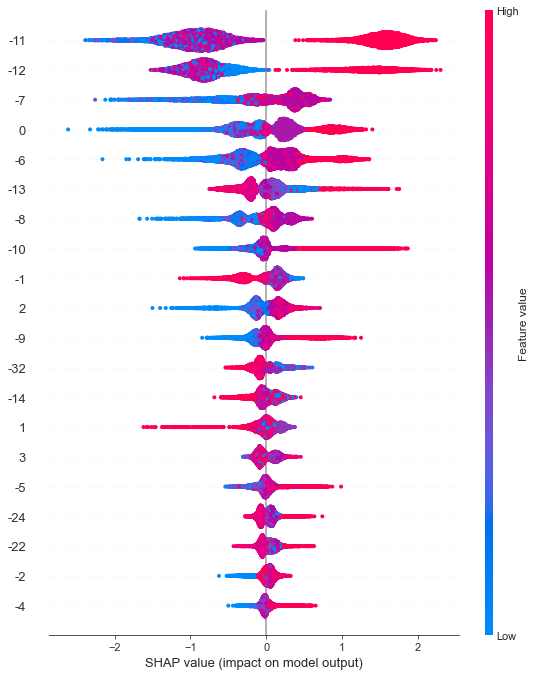

In [56]:
shap.summary_plot(shap_values, X_promoters, feature_names = X_promoters.columns)

AttributeError: 'int' object has no attribute 'split'

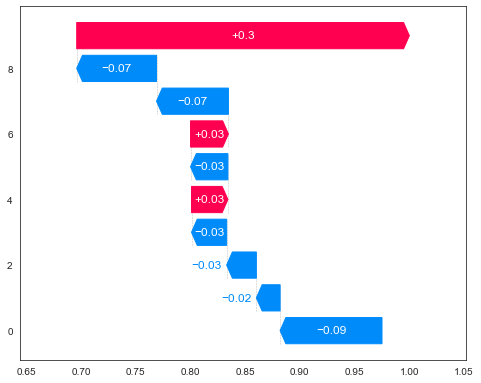

In [55]:
shap.plots._waterfall.waterfall_legacy(explainer.expected_value, shap_values[4], feature_names = X_PCA_promoters.columns)

In [ ]:
shap.initjs()
shap.plots.force(explainer.expected_value, shap_values, feature_names = X_PCA_promoters.columns)

In [ ]:
shap.initjs()
shap.plots.force(explainer.expected_value,shap_values[0], feature_names = X_PCA_promoters.columns)

# Test Organism Predictions

## Test Data

In [47]:
# Load the Test organisms dataset into a DataFrame
klebsiella = pd.read_csv(r"D:\ten organism\ussrey\test organism\stability_Sequences_80-20_sequences Klebsiella pneumoniae_output.csv")
salmonella= pd.read_csv(r"D:\ten organism\ussrey\test organism\stability_Sequences_80-20_sequences Salmonella enterica_output.csv")
klebsiella_downstream= pd.read_csv(r"D:\downstream control\ussrey\result\test organism\stability_Klebsiella pneumoniae_output.csv")
salmonella_downstream= pd.read_csv(r"D:\downstream control\ussrey\result\test organism\stability_Salmonella enterica_output.csv")

# Remove any irrelevant columns
test_organism = pd.concat([klebsiella,salmonella])
test_organism.columns=new_columns
test_organism.reset_index(drop=True, inplace=True)

test_organism_downstream= pd.concat([klebsiella_downstream,salmonella_downstream])
test_organism_downstream.columns=new_columns
test_organism_downstream.reset_index(drop=True, inplace=True)

test_without_labels= pd.concat([test_organism, test_organism_downstream])


In [48]:
test_line= pd.DataFrame(test_organism.mean())
test_line.reset_index(drop=False, inplace=True)
downstream_test_line=pd.DataFrame(test_organism_downstream.mean())
downstream_test_line.reset_index(drop= False, inplace=True)



[Text(0.5, 0, 'Nucleotide Position'),
 Text(0, 0.5, 'Stacking'),
 Text(0.5, 1.0, 'Ussrey Test Organism')]

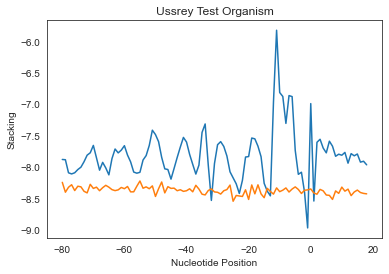

In [49]:
test_plot=sns.lineplot(x='index',y=0,data=test_line)
test_plot=sns.lineplot(x='index',y=0, data= downstream_test_line)

test_plot.set(xlabel ="Nucleotide Position", ylabel = "Stacking", title ='Ussrey Test Organism')

## Test Labels

In [50]:
test_organism_lables= np.ones(test_organism.shape[0], dtype=int)
test_downstream_labels= np.zeros(test_organism_downstream.shape[0], dtype=int)

test_labels = np.concatenate((test_organism_lables, test_downstream_labels))

In [51]:
test_without_labels.shape

(4620, 99)

## Test Prediction in One Go

In [52]:
# Create an array of ones with the same number of rows as the new dataset
#true_labels = np.ones(test_organism.shape[0], dtype=int)

# Make predictions on the new data
test_organism_pred = clf.predict(test_without_labels)

# Calculate the accuracy of the model on the new data
accuracy = metrics.accuracy_score(test_labels, test_organism_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9155844155844156


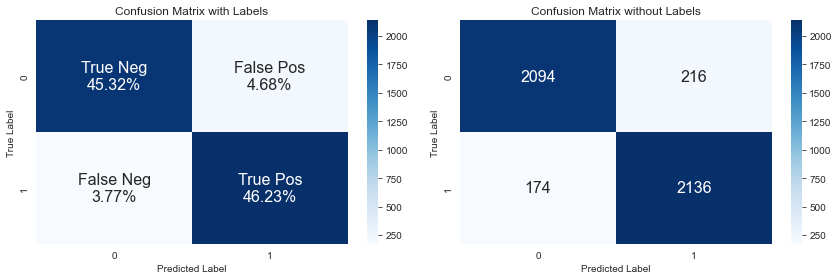

In [53]:
# Compute confusion matrix
cm = confusion_matrix(test_labels, test_organism_pred)

# Define labels for the four quadrants of the confusion matrix
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']

# Reshape confusion matrix into a 1D array for plotting
cm_array = cm.ravel()

# Compute percentage values for each quadrant
percentages = ['{0:.2%}'.format(value) for value in cm_array / np.sum(cm_array)]

# Combine labels and percentages into a list of strings for plotting
labels = [f"{v1}\n{v2}" for v1, v2 in zip(labels, percentages)]

# Reshape labels into a 2D array for plotting
labels = np.asarray(labels).reshape(2,2)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot with labels
#sns.set(font_scale=1.4, ax=axes[0])
sns.heatmap(cm, annot=labels, annot_kws={"size": 16}, cmap='Blues', fmt='', ax=axes[0])
axes[0].set_title('Confusion Matrix with Labels')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# Plot without labels
#sns.set(font_scale=1.4, ax=axes[1])
sns.heatmap(cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g', ax=axes[1])
axes[1].set_title('Confusion Matrix without Labels')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()


## Test Prediction in 10 splits

In [54]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score

In [55]:
# Convert DataFrame to numpy array
if isinstance(test_without_labels, pd.DataFrame):
    test_without_labels = test_without_labels.to_numpy()

# Split data into 10 equal parts
n_splits = 10
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

test_accuracy = []
test_precision = []
test_recall = []
test_f1_score = []
test_mcc = []
test_specificity = []
all_cms = []

# Perform predictions on each part
for i, (train_index, test_index) in enumerate(skf.split(test_without_labels, test_labels)):
    print(f"Fold {i+1}/{n_splits}")
    
    # Split data into train and test sets for this fold
    X_test = test_without_labels[test_index]
    y_test = test_labels[test_index]
    
    # Make predictions on the test set for this fold
    y_pred = clf.predict(X_test)
    
    # Calculate evaluation metrics for this fold
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    test_accuracy.append(accuracy)
    test_precision.append(precision)
    test_recall.append(recall)
    test_f1_score.append(f1)
    
    # Calculate confusion matrix for this fold
    cm = confusion_matrix(y_test, y_pred)
    all_cms.append(cm)
    
    # Calculate MCC
    mcc = matthews_corrcoef(y_test, y_pred)
    test_mcc.append(mcc)
    
    # Calculate specificity
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    test_specificity.append(specificity)
    
    print(" Accuracy: {}, Precision: {}, Recall: {}, F1 Score: {}, MCC: {}, Specificity: {}".format(
        test_accuracy[-1], test_precision[-1], test_recall[-1], test_f1_score[-1], test_mcc[-1], test_specificity[-1]))

Fold 1/10
 Accuracy: 0.9177489177489178, Precision: 0.9213973799126638, Recall: 0.9134199134199135, F1 Score: 0.9173913043478261, MCC: 0.835529152182711, Specificity: 0.922077922077922
Fold 2/10
 Accuracy: 0.9134199134199135, Precision: 0.8835341365461847, Recall: 0.9523809523809523, F1 Score: 0.9166666666666665, MCC: 0.8293615400622771, Specificity: 0.8744588744588745
Fold 3/10
 Accuracy: 0.8787878787878788, Precision: 0.8600823045267489, Recall: 0.9047619047619048, F1 Score: 0.8818565400843883, MCC: 0.7586000281230685, Specificity: 0.8528138528138528
Fold 4/10
 Accuracy: 0.9177489177489178, Precision: 0.897119341563786, Recall: 0.9437229437229437, F1 Score: 0.9198312236286921, MCC: 0.8366274595871556, Specificity: 0.8917748917748918
Fold 5/10
 Accuracy: 0.9372294372294372, Precision: 0.9316239316239316, Recall: 0.9437229437229437, F1 Score: 0.9376344086021506, MCC: 0.8745326280013207, Specificity: 0.9307359307359307
Fold 6/10
 Accuracy: 0.9134199134199135, Precision: 0.91341991341991

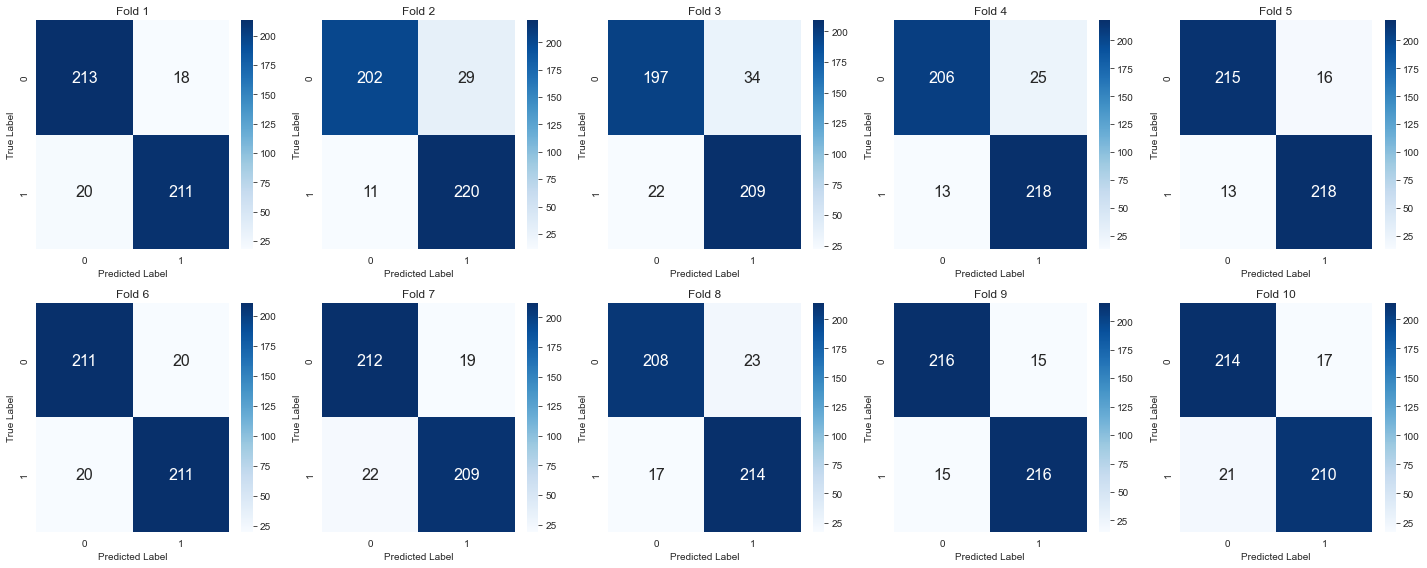

In [56]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 5, figsize=(20, 8))
for i, ax in enumerate(axs.flatten()):
    if i < len(all_cms):
        cm = all_cms[i]
        sns.heatmap(cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g', ax=ax)
        ax.set_title(f"Fold {i+1}")
        ax.set_xlabel('Predicted Label')
        ax.set_ylabel('True Label')
    else:
        ax.axis('off')
plt.tight_layout()
plt.show()


In [57]:
test_accuracy

[0.9177489177489178,
 0.9134199134199135,
 0.8787878787878788,
 0.9177489177489178,
 0.9372294372294372,
 0.9134199134199135,
 0.9112554112554112,
 0.9134199134199135,
 0.935064935064935,
 0.9177489177489178]

In [58]:
test_precision

[0.9213973799126638,
 0.8835341365461847,
 0.8600823045267489,
 0.897119341563786,
 0.9316239316239316,
 0.9134199134199135,
 0.9166666666666666,
 0.9029535864978903,
 0.935064935064935,
 0.9251101321585903]

- Precision equal to 1.0 means that all the positive predictions made by the classifier are correct. 
- In other words, the classifier didn't make any false positive predictions. 

In [59]:
test_recall

[0.9134199134199135,
 0.9523809523809523,
 0.9047619047619048,
 0.9437229437229437,
 0.9437229437229437,
 0.9134199134199135,
 0.9047619047619048,
 0.9264069264069265,
 0.935064935064935,
 0.9090909090909091]

In [60]:
test_specificity

[0.922077922077922,
 0.8744588744588745,
 0.8528138528138528,
 0.8917748917748918,
 0.9307359307359307,
 0.9134199134199135,
 0.9177489177489178,
 0.9004329004329005,
 0.935064935064935,
 0.9264069264069265]

In [61]:
test_f1_score

[0.9173913043478261,
 0.9166666666666665,
 0.8818565400843883,
 0.9198312236286921,
 0.9376344086021506,
 0.9134199134199135,
 0.9106753812636165,
 0.9145299145299145,
 0.935064935064935,
 0.9170305676855895]

In [62]:
test_mcc

[0.835529152182711,
 0.8293615400622771,
 0.7586000281230685,
 0.8366274595871556,
 0.8745326280013207,
 0.8268398268398268,
 0.8225801946547077,
 0.8271188818011433,
 0.8701298701298701,
 0.835623123370552]

## Antisense Promoters with Downstream

###### Bacteria Names
- Chlamydia pneumoniae
- Corynebacterium glutamicum
- Helicobactor pylori
- Mycobacterium tuberculosis
- Nostoc sp
- Pseudomonas aeruginosa
- Salmonella enterica
- Streptomyces coelicolor
- Synechocystis sp

In [63]:
antisense= pd.read_csv(r"D:\Other promoters\Downstream sequences\Antisense\Antisense promoter vs downstream\Antisense ussrey promoter vs downstream.csv")
antisense

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,10,11,12,13,14,15,16,17,18,label
0,-3.82,-6.78,-8.26,-9.81,-6.57,-5.37,-9.81,-6.78,-5.37,-5.37,...,-8.26,-6.57,-5.37,-5.37,-5.37,-6.78,-9.81,-5.37,-6.78,1
1,-9.81,-5.37,-6.78,-14.59,-9.69,-9.81,-6.57,-3.82,-5.37,-6.78,...,-5.37,-6.78,-14.59,-6.57,-6.57,-9.81,-8.26,-6.57,-5.37,1
2,-5.37,-9.81,-6.57,-6.57,-6.57,-9.81,-6.57,-3.82,-6.57,-3.82,...,-6.78,-14.59,-6.78,-9.81,-9.69,-10.51,-3.82,-5.37,-5.37,1
3,-9.81,-6.78,-3.82,-6.78,-9.81,-5.37,-6.78,-14.59,-6.78,-6.57,...,-6.57,-8.26,-9.81,-6.78,-9.81,-5.37,-5.37,-6.57,-6.57,1
4,-6.78,-8.26,-10.51,-3.82,-5.37,-5.37,-6.57,-3.82,-10.51,-8.26,...,-6.57,-6.78,-8.26,-14.59,-8.26,-8.26,-6.78,-9.81,-6.78,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12163,-9.69,-10.51,-5.37,-5.37,-9.81,-8.26,-8.26,-8.26,-6.78,-5.37,...,-5.37,-9.81,-6.57,-6.57,-9.81,-9.69,-10.51,-9.81,-8.26,0
12164,-5.37,-9.81,-6.78,-5.37,-9.81,-9.69,-8.26,-10.51,-6.57,-14.59,...,-10.51,-8.26,-9.69,-8.26,-9.81,-6.78,-14.59,-9.69,-9.81,0
12165,-6.78,-6.57,-9.81,-6.57,-6.57,-8.26,-8.26,-8.26,-9.81,-6.78,...,-10.51,-6.78,-3.82,-5.37,-10.51,-6.57,-6.78,-14.59,-8.26,0
12166,-5.37,-6.78,-9.81,-6.57,-5.37,-6.57,-14.59,-9.69,-8.26,-8.26,...,-8.26,-8.26,-9.81,-10.51,-6.78,-5.37,-5.37,-3.82,-6.78,0


In [64]:
antisense_promoter= antisense.drop(columns=['label'])
antisense_label= antisense['label']

In [65]:
# Convert DataFrame to numpy array
if isinstance(antisense_promoter, pd.DataFrame):
    antisense_promoter = antisense_promoter.to_numpy()

# Split data into 10 equal parts
n_splits = 10
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

antisense_accuracy = []
antisense_precision=[]
antisense_recall=[]
antisense_f1_score=[]
antisense_cms = []
antisense_mcc = []
antisense_specificity = []

# Perform predictions on each part
for i, (train_index, test_index) in enumerate(skf.split(antisense_promoter, antisense_label)):
    print(f"Fold {i+1}/{n_splits}")
    
    # Split data into train and test sets for this fold
    X_test = antisense_promoter[test_index]
    y_test = antisense_label[test_index]
    
    # Make predictions on the test set for this fold
    y_pred = clf.predict(X_test)
    
    
    # Calculate evaluation metrics for this fold
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    antisense_accuracy.append(accuracy)
    antisense_precision.append(precision)
    antisense_recall.append(recall)
    antisense_f1_score.append(f1)
    
    # Calculate MCC
    mcc = matthews_corrcoef(y_test, y_pred)
    antisense_mcc.append(mcc)
    
    # Calculate specificity
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    antisense_specificity.append(specificity)
    
    print(" Accuracy: {}, Precision: {}, Recall: {}, F1 Score: {}, MCC: {}, Specificity: {}".format(
    antisense_accuracy[-1], antisense_precision[-1], antisense_recall[-1], antisense_f1_score[-1],
    antisense_mcc[-1], antisense_specificity[-1]))

    #fold_no += 1

    # Calculate confusion matrix for this fold
    cm = confusion_matrix(y_test, y_pred)
    antisense_cms.append(cm)


Fold 1/10
 Accuracy: 0.8069022185702547, Precision: 0.8191126279863481, Recall: 0.7881773399014779, F1 Score: 0.803347280334728, MCC: 0.6142550872509598, Specificity: 0.9264069264069265
Fold 2/10
 Accuracy: 0.8159408381265407, Precision: 0.8070175438596491, Recall: 0.8308702791461412, F1 Score: 0.8187702265372169, MCC: 0.6321491294875506, Specificity: 0.8256578947368421
Fold 3/10
 Accuracy: 0.8266228430566968, Precision: 0.835016835016835, Recall: 0.8144499178981938, F1 Score: 0.824605153782211, MCC: 0.6534510362380911, Specificity: 0.8009868421052632
Fold 4/10
 Accuracy: 0.8315529991783073, Precision: 0.8311475409836065, Recall: 0.8325123152709359, F1 Score: 0.8318293683347007, MCC: 0.663106211398936, Specificity: 0.8388157894736842
Fold 5/10
 Accuracy: 0.8241577649958916, Precision: 0.8283333333333334, Recall: 0.8174342105263158, F1 Score: 0.8228476821192053, MCC: 0.6483675308041237, Specificity: 0.8305921052631579
Fold 6/10
 Accuracy: 0.8331963845521775, Precision: 0.820919175911252

In [66]:
antisense_accuracy

[0.8069022185702547,
 0.8159408381265407,
 0.8266228430566968,
 0.8315529991783073,
 0.8241577649958916,
 0.8331963845521775,
 0.8225143796220213,
 0.8233360723089564,
 0.8125,
 0.834703947368421]

In [67]:
antisense_precision

[0.8191126279863481,
 0.8070175438596491,
 0.835016835016835,
 0.8311475409836065,
 0.8283333333333334,
 0.820919175911252,
 0.8234323432343235,
 0.8164251207729468,
 0.8114754098360656,
 0.8443316412859561]

In [68]:
antisense_recall

[0.7881773399014779,
 0.8308702791461412,
 0.8144499178981938,
 0.8325123152709359,
 0.8174342105263158,
 0.8519736842105263,
 0.8207236842105263,
 0.8338815789473685,
 0.8141447368421053,
 0.8207236842105263]

In [69]:
antisense_specificity

[0.9264069264069265,
 0.8256578947368421,
 0.8009868421052632,
 0.8388157894736842,
 0.8305921052631579,
 0.8308702791461412,
 0.8144499178981938,
 0.8243021346469622,
 0.812807881773399,
 0.8108552631578947]

In [70]:
antisense_f1_score

[0.803347280334728,
 0.8187702265372169,
 0.824605153782211,
 0.8318293683347007,
 0.8228476821192053,
 0.8361581920903955,
 0.8220757825370677,
 0.8250610252237591,
 0.812807881773399,
 0.8323603002502085]

In [71]:
antisense_mcc

[0.6142550872509598,
 0.6321491294875506,
 0.6534510362380911,
 0.663106211398936,
 0.6483675308041237,
 0.6668794242490622,
 0.6450310450181875,
 0.6468257327649005,
 0.625003381476542,
 0.6696697168088378]

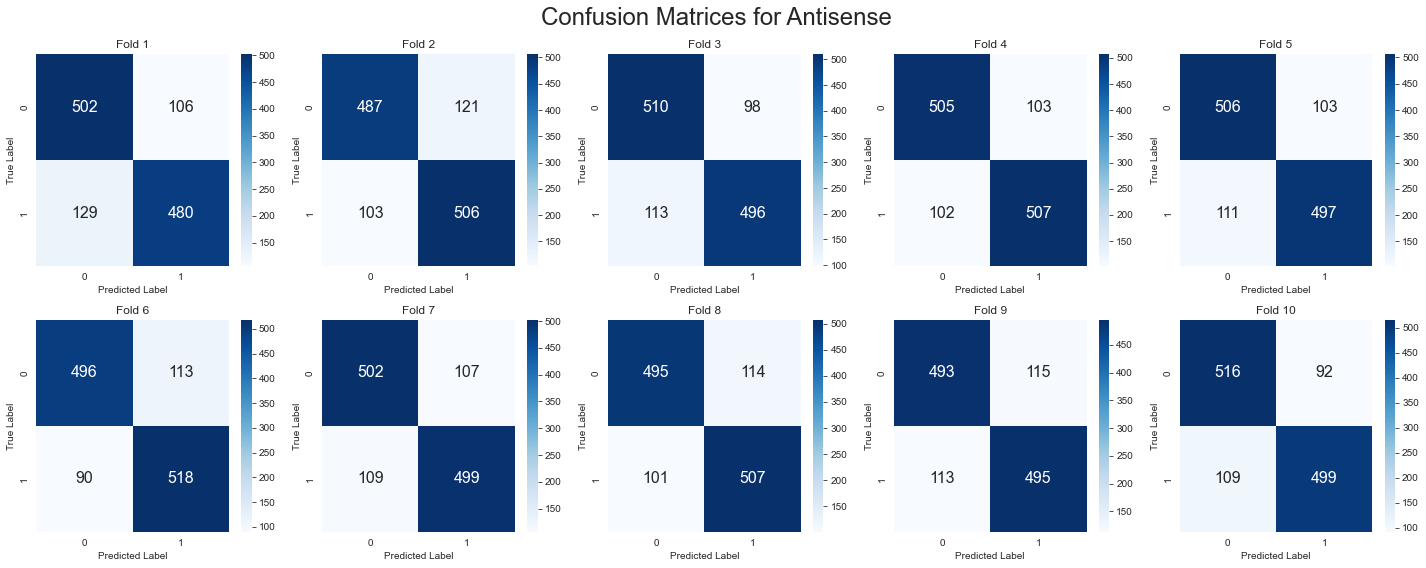

In [72]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 5, figsize=(20, 8))
fig.suptitle("Confusion Matrices for Antisense", fontsize=24)

for i, ax in enumerate(axs.flatten()):
    if i < len(antisense_cms):
        cm = antisense_cms[i]
        sns.heatmap(cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g', ax=ax)
        ax.set_title(f"Fold {i+1}")
        ax.set_xlabel('Predicted Label')
        ax.set_ylabel('True Label')
    else:
        ax.axis('off')
plt.tight_layout()
plt.show()


## Induced Promoter with downstream

In [73]:
internal= pd.read_csv(r"D:\Other promoters\Downstream sequences\Induced\Induced promoter vs downstream\Induced ussrey promoter vs downstream.csv")
internal

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,10,11,12,13,14,15,16,17,18,label
0,-6.78,-9.81,-9.69,-10.51,-3.82,-10.51,-9.69,-8.26,-8.26,-9.81,...,-5.37,-6.78,-9.81,-5.37,-5.37,-5.37,-6.57,-9.81,-6.57,1
1,-6.57,-9.81,-6.57,-5.37,-5.37,-6.57,-5.37,-5.37,-3.82,-10.51,...,-6.57,-6.78,-14.59,-6.78,-5.37,-3.82,-6.57,-6.57,-14.59,1
2,-8.26,-8.26,-14.59,-8.26,-6.57,-6.57,-6.57,-14.59,-6.57,-6.78,...,-6.78,-14.59,-6.57,-5.37,-6.57,-5.37,-6.57,-14.59,-6.78,1
3,-10.51,-6.57,-5.37,-10.51,-6.78,-6.57,-9.81,-6.57,-5.37,-3.82,...,-5.37,-5.37,-10.51,-9.69,-9.81,-5.37,-5.37,-6.57,-9.81,1
4,-6.78,-9.81,-6.78,-5.37,-5.37,-3.82,-5.37,-5.37,-6.57,-9.81,...,-10.51,-6.57,-5.37,-6.78,-9.81,-5.37,-5.37,-5.37,-6.57,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12125,-8.26,-14.59,-8.26,-8.26,-6.57,-10.51,-9.69,-8.26,-14.59,-9.69,...,-6.57,-5.37,-10.51,-6.78,-9.81,-8.26,-8.26,-9.69,-8.26,0
12126,-8.26,-9.69,-9.81,-10.51,-9.69,-14.59,-6.57,-5.37,-6.78,-14.59,...,-8.26,-14.59,-9.69,-9.81,-5.37,-10.51,-8.26,-9.69,-14.59,0
12127,-5.37,-6.78,-9.81,-5.37,-6.78,-9.81,-10.51,-8.26,-9.69,-9.81,...,-6.57,-10.51,-9.69,-14.59,-8.26,-6.57,-10.51,-8.26,-6.57,0
12128,-14.59,-8.26,-9.69,-9.81,-5.37,-6.78,-9.81,-10.51,-8.26,-6.57,...,-14.59,-9.69,-8.26,-9.81,-6.57,-9.81,-9.69,-8.26,-14.59,0


In [74]:
internal_promoter= internal.drop(columns=['label'])
internal_label= internal['label']

In [75]:
# Convert DataFrame to numpy array
if isinstance(internal_promoter, pd.DataFrame):
    internal_promoter = internal_promoter.to_numpy()

# Split data into 10 equal parts
n_splits = 10
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

internal_accuracy = []
internal_precision=[]
internal_recall=[]
internal_f1_score=[]
internal_cms = []
internal_mcc = []
internal_specificity = []


# Perform predictions on each part
for i, (train_index, test_index) in enumerate(skf.split(internal_promoter, internal_label)):
    print(f"Fold {i+1}/{n_splits}")
    
    # Split data into train and test sets for this fold
    X_test = internal_promoter[test_index]
    y_test = internal_label[test_index]
    
    # Make predictions on the test set for this fold
    y_pred = clf.predict(X_test)
    
    # Calculate specificity
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    
    # Calculate evaluation metrics for this fold
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    
    internal_accuracy.append(accuracy)
    internal_precision.append(precision)
    internal_recall.append(recall)
    internal_f1_score.append(f1)
    internal_mcc.append(mcc)
    internal_specificity.append(specificity)
    
    print(" Accuracy: {}, Precision: {}, Recall: {}, F1 Score: {}, MCC: {}, Specificity: {}".format(
    internal_accuracy[-1], internal_precision[-1], internal_recall[-1], internal_f1_score[-1],
    internal_mcc[-1], internal_specificity[-1]))
    #fold_no += 1

    # Calculate confusion matrix for this fold
    cm = confusion_matrix(y_test, y_pred)
    internal_cms.append(cm)


Fold 1/10
 Accuracy: 0.8120362737015664, Precision: 0.8318739054290718, Recall: 0.7825370675453048, F1 Score: 0.806451612903226, MCC: 0.6251929072829795, Specificity: 0.8486842105263158
Fold 2/10
 Accuracy: 0.8037922506183017, Precision: 0.8300536672629696, Recall: 0.7644151565074135, F1 Score: 0.7958833619210979, MCC: 0.6095214729403982, Specificity: 0.8415841584158416
Fold 3/10
 Accuracy: 0.8046166529266282, Precision: 0.8291814946619217, Recall: 0.7677100494233937, F1 Score: 0.7972626176218991, MCC: 0.610940695733482, Specificity: 0.8432343234323433
Fold 4/10
 Accuracy: 0.8029678483099753, Precision: 0.8333333333333334, Recall: 0.7578253706754531, F1 Score: 0.7937877480586712, MCC: 0.6084716036661147, Specificity: 0.8415841584158416
Fold 5/10
 Accuracy: 0.7881286067600989, Precision: 0.8091872791519434, Recall: 0.7545304777594728, F1 Score: 0.7809036658141517, MCC: 0.5776016944383803, Specificity: 0.8481848184818482
Fold 6/10
 Accuracy: 0.8178070898598516, Precision: 0.8324697754749

In [76]:
internal_accuracy

[0.8120362737015664,
 0.8037922506183017,
 0.8046166529266282,
 0.8029678483099753,
 0.7881286067600989,
 0.8178070898598516,
 0.8285243198680956,
 0.8136850783182193,
 0.8219291014014839,
 0.843363561417972]

In [77]:
internal_precision

[0.8318739054290718,
 0.8300536672629696,
 0.8291814946619217,
 0.8333333333333334,
 0.8091872791519434,
 0.8324697754749568,
 0.8515901060070671,
 0.8356890459363958,
 0.8482142857142857,
 0.8741007194244604]

In [78]:
internal_recall

[0.7825370675453048,
 0.7644151565074135,
 0.7677100494233937,
 0.7578253706754531,
 0.7545304777594728,
 0.7953795379537953,
 0.7953795379537953,
 0.7805280528052805,
 0.7838283828382838,
 0.801980198019802]

In [79]:
internal_specificity

[0.8486842105263158,
 0.8415841584158416,
 0.8432343234323433,
 0.8415841584158416,
 0.8481848184818482,
 0.8217821782178217,
 0.8401976935749588,
 0.8616144975288303,
 0.8467874794069192,
 0.8599670510708401]

In [80]:
internal_f1_score

[0.806451612903226,
 0.7958833619210979,
 0.7972626176218991,
 0.7937877480586712,
 0.7809036658141517,
 0.8135021097046413,
 0.8225255972696246,
 0.8071672354948805,
 0.8147512864493998,
 0.8364888123924268]

In [81]:
internal_mcc

[0.6251929072829795,
 0.6095214729403982,
 0.610940695733482,
 0.6084716036661147,
 0.5776016944383803,
 0.6362313687749764,
 0.6584635339773357,
 0.6287186488015565,
 0.6456957764015846,
 0.6890514636685472]

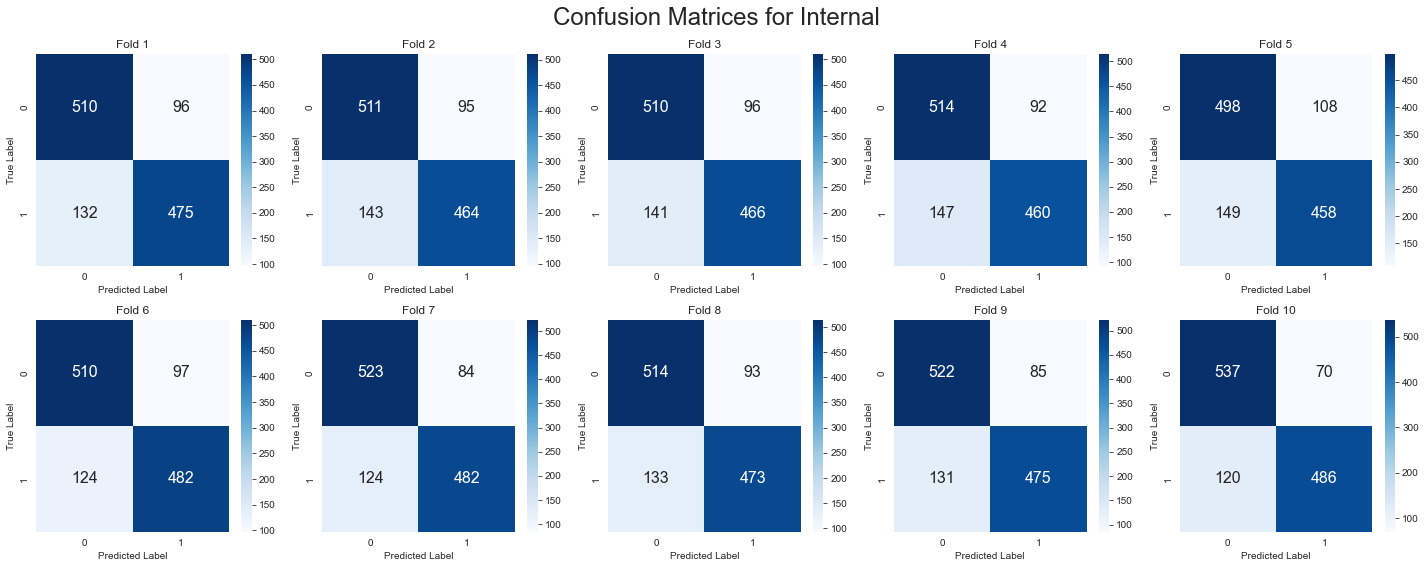

In [82]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 5, figsize=(20, 8))
fig.suptitle("Confusion Matrices for Internal", fontsize=24)

for i, ax in enumerate(axs.flatten()):
    if i < len(internal_cms):
        cm = internal_cms[i]
        sns.heatmap(cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g', ax=ax)
        ax.set_title(f"Fold {i+1}")
        ax.set_xlabel('Predicted Label')
        ax.set_ylabel('True Label')
    else:
        ax.axis('off')
plt.tight_layout()
plt.show()
